<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np


Fist step is load data
At this step we are going to use MIST data set

In [ ]:
#Load data
minst = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = minst.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.Shape = ", X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train.Shape =  (60000, 28, 28)


Seconde step: instantiate the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

Thrid Step is Train the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
#Train the model
r = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),batch_size = 10, epochs=10)

Epoch 1/10
6000/6000 [==============================] - 23s 3ms/step - loss: 0.2157 - accuracy: 0.9361 - val_loss: 0.1154 - val_accuracy: 0.9631
Epoch 2/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1028 - accuracy: 0.9688 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 3/10
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0744 - accuracy: 0.9768 - val_loss: 0.1028 - val_accuracy: 0.9699
Epoch 4/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0579 - accuracy: 0.9814 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 5/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0859 - val_accuracy: 0.9762
Epoch 6/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0889 - val_accuracy: 0.9750
Epoch 7/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0765 - val_ac

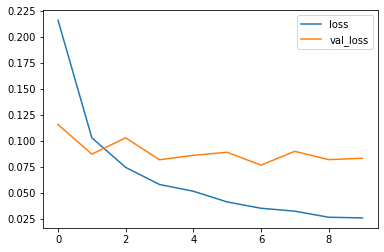

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

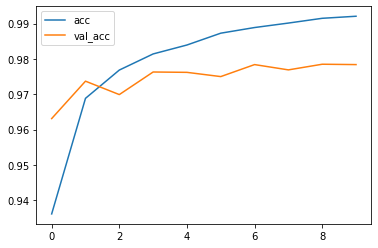

In [ ]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[ 970    0    2    0    0    0    2    2    3    1]
 [   0 1127    0    2    0    2    0    0    4    0]
 [   1    2 1015    4    1    1    0    2    4    2]
 [   1    1    1  989    0   10    0    5    3    0]
 [   0    3    5    0  943    0    6    2    0   23]
 [   2    0    0   14    1  867    3    1    3    1]
 [   4    3    1    0    1    6  939    1    3    0]
 [   0    3    7    6    0    0    0 1004    3    5]
 [   3    0    2    6    2    1    1    3  954    2]
 [   4    3    0    5    7    5    0    5    4  976]]


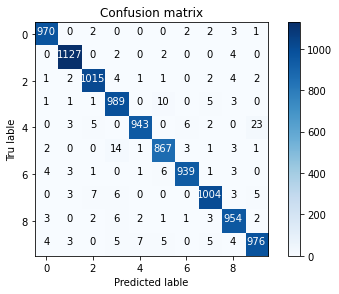

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plt_c_m(cm,classes,
            normalize =False,
            title = 'Confusion matrix',
            cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
      print("Confusion matrix, without normalization")
  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else "black")
  plt.tight_layout()  
  plt.ylabel("Truث lable")
  plt.xlabel("Predicted lable")
  plt.show()
test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(Y_test, test)
plt_c_m(cm,list(range(10)), normalize = False)

Text(0.5, 1.0, 'True label is: 9 and predicted one is: 3')

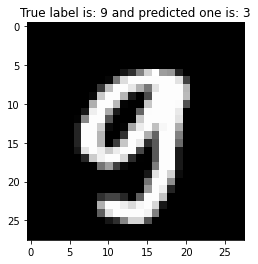

In [ ]:
#Some misclassifid examples
misclassified_idx = np.where(test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap = 'gray')
plt.title('True label is: %s and predicted one is: %s' % (Y_test[i], test[i]))